Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated 


Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [32]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Importing dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Exploratory Data Analysis

In [35]:
# dimension of the dataset
df.shape

(1338, 7)

In [36]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
# Checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [38]:
# checking age value_counts and total number of unique values. 
print('values:- ',df['age'].value_counts())
print('\n')
print('Total no. Unique Values:- ',df['age'].nunique())

values:-  18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


Total no. Unique Values:-  47


In [39]:
#checking value_counts and total unique values in sex column
print('values:- ',df['sex'].value_counts())
print('\n')
print('Total no. Unique Values:- ',df['sex'].nunique())

values:-  male      676
female    662
Name: sex, dtype: int64


Total no. Unique Values:-  2


In [40]:
#checking value_counts and total unique values in bmi column
print('values:- ',df['bmi'].value_counts())
print('\n')
print('Total no. Unique Values:- ',df['bmi'].nunique())

values:-  32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


Total no. Unique Values:-  548


In [41]:
#checking value_counts and total unique values in children column
print('values:- ',df['children'].value_counts())
print('\n')
print('Total no. Unique Values:- ',df['children'].nunique())

values:-  0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


Total no. Unique Values:-  6


In [42]:
#checking value_counts and total unique values in smoker column
print('values:- ',df['smoker'].value_counts())
print('\n')
print('Total no. Unique Values:- ',df['smoker'].nunique())

values:-  no     1064
yes     274
Name: smoker, dtype: int64


Total no. Unique Values:-  2


In [43]:
#checking value_counts and total unique values in region column
print('values:- ',df['region'].value_counts())
print('\n')
print('Total no. Unique Values:- ',df['region'].nunique())

values:-  southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Total no. Unique Values:-  4


In [44]:
#checking value_counts and total unique values in charges column
print('values:- ',df['charges'].value_counts())
print('\n')
print('Total no. Unique Values:- ',df['charges'].nunique())

values:-  1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


Total no. Unique Values:-  1337


In [45]:
# Checking duplicate rows in data
df.duplicated().sum()

1

dataset have 1 duplicate value

In [46]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [47]:
df[df['charges']==1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


These two rows has same value in every column so we are going to drop it

In [48]:
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

0

In [51]:
df.shape

(1337, 7)

In [52]:
df['charges'].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

# Statistical Summary

In [53]:
# Description of data.
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Graphical Analysis

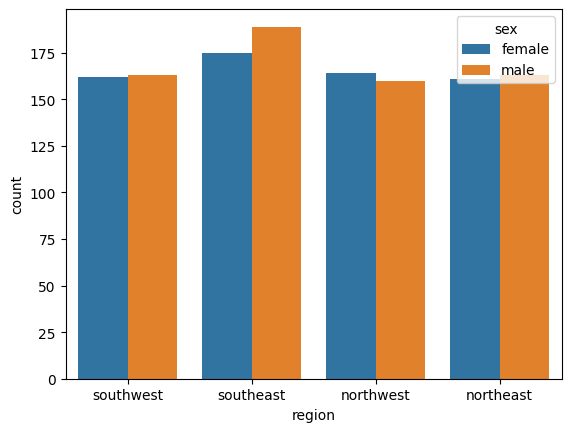

In [54]:
# Cheking gender of patients from each region.
sns.countplot(x='region',data=df,hue='sex')
plt.show()

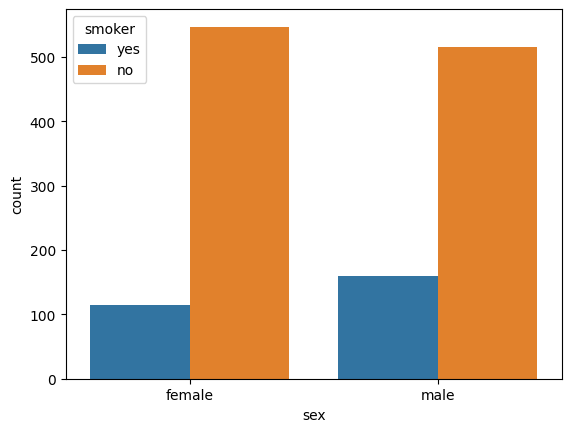

In [55]:
# checking number of smoker in both genders
sns.countplot(x='sex',data=df,hue='smoker')
plt.show()

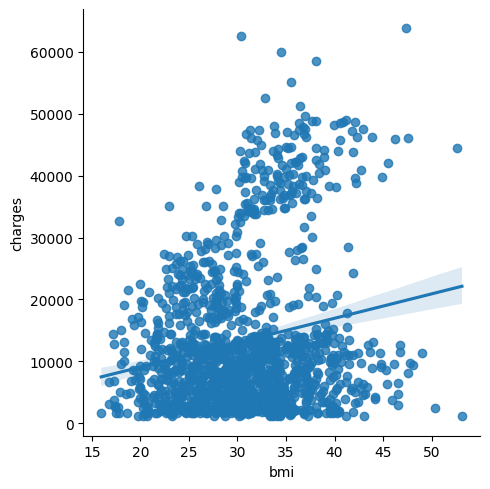

In [56]:
#Checking relation of bmi with charges columns
sns.lmplot(x='bmi',y='charges',data=df)
plt.show()

# Encoding

In [57]:
#importing Library
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()

In [59]:
# Encoding sex and region and smoker column
df['sex']=le.fit_transform(df['sex'])
df['region']=le.fit_transform(df['region'])
df['smoker']=le.fit_transform(df['smoker'])

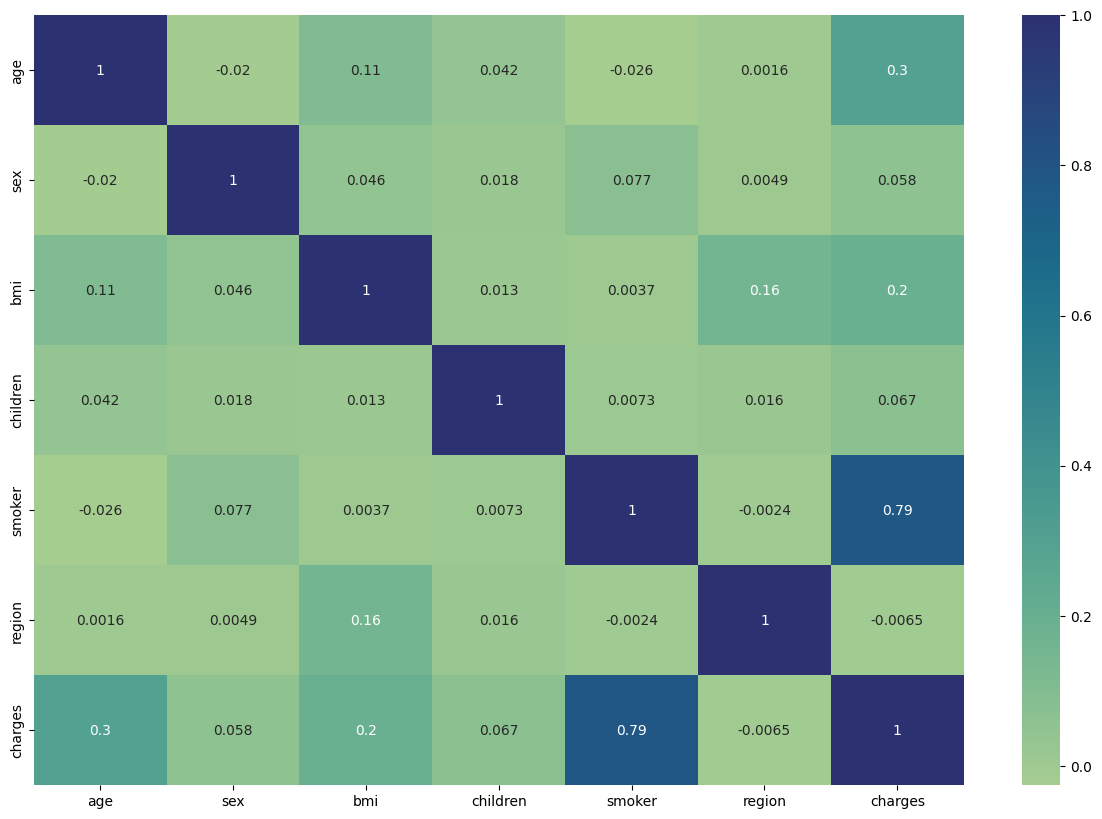

In [60]:
# visualizing Correlatoin of data
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

MultiVariate Analysis

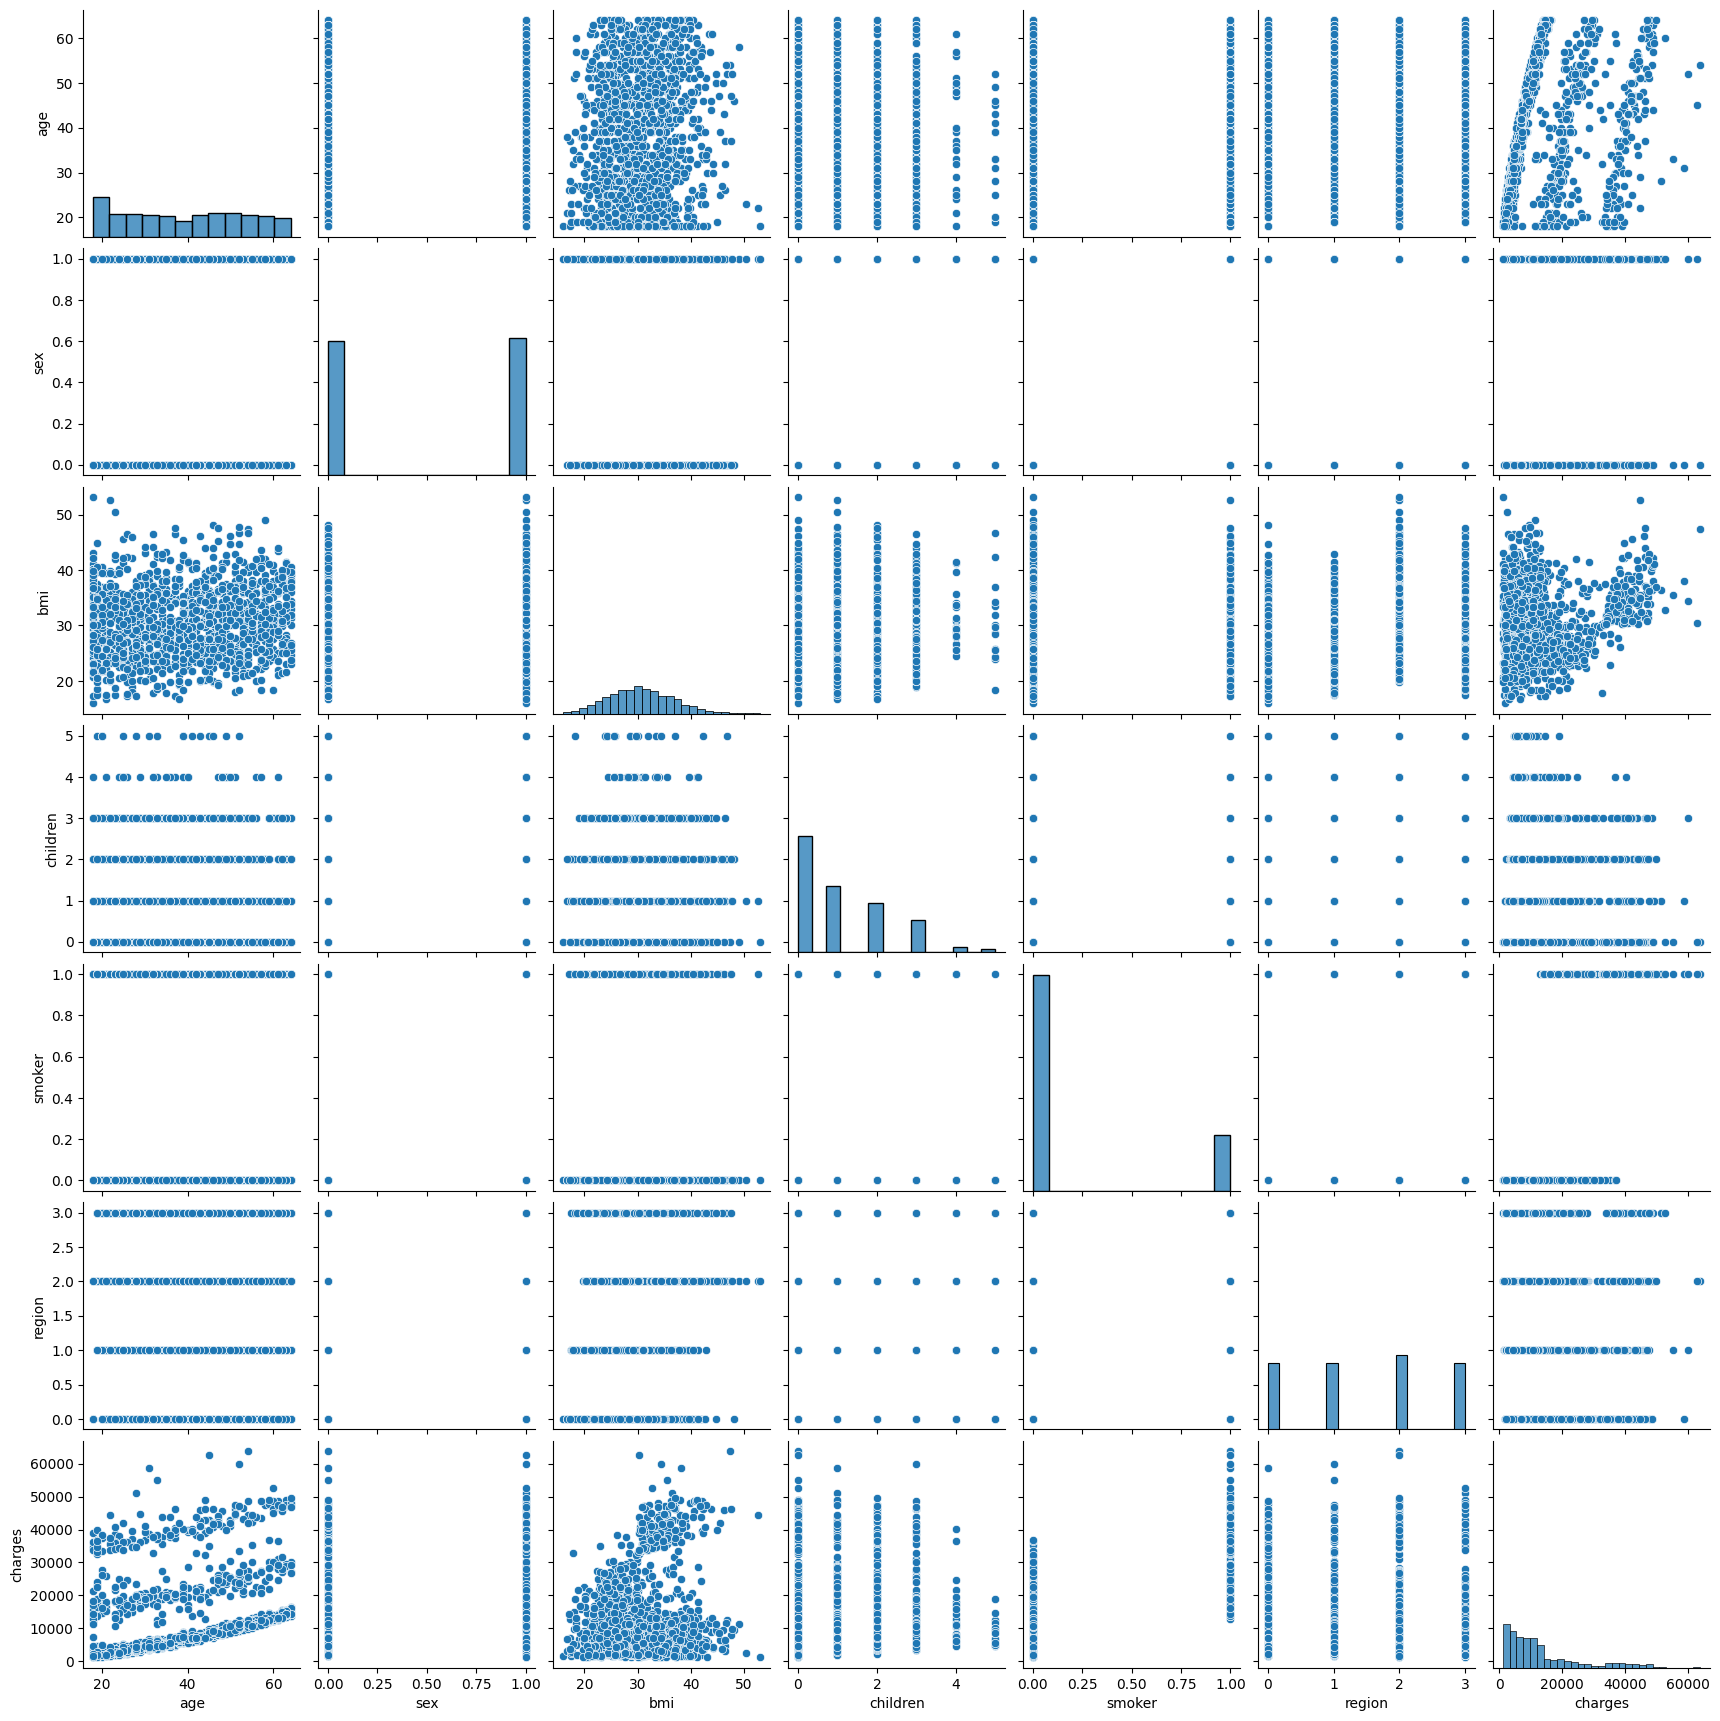

In [61]:
sns.pairplot(df)
plt.show()

# Checking Outliers

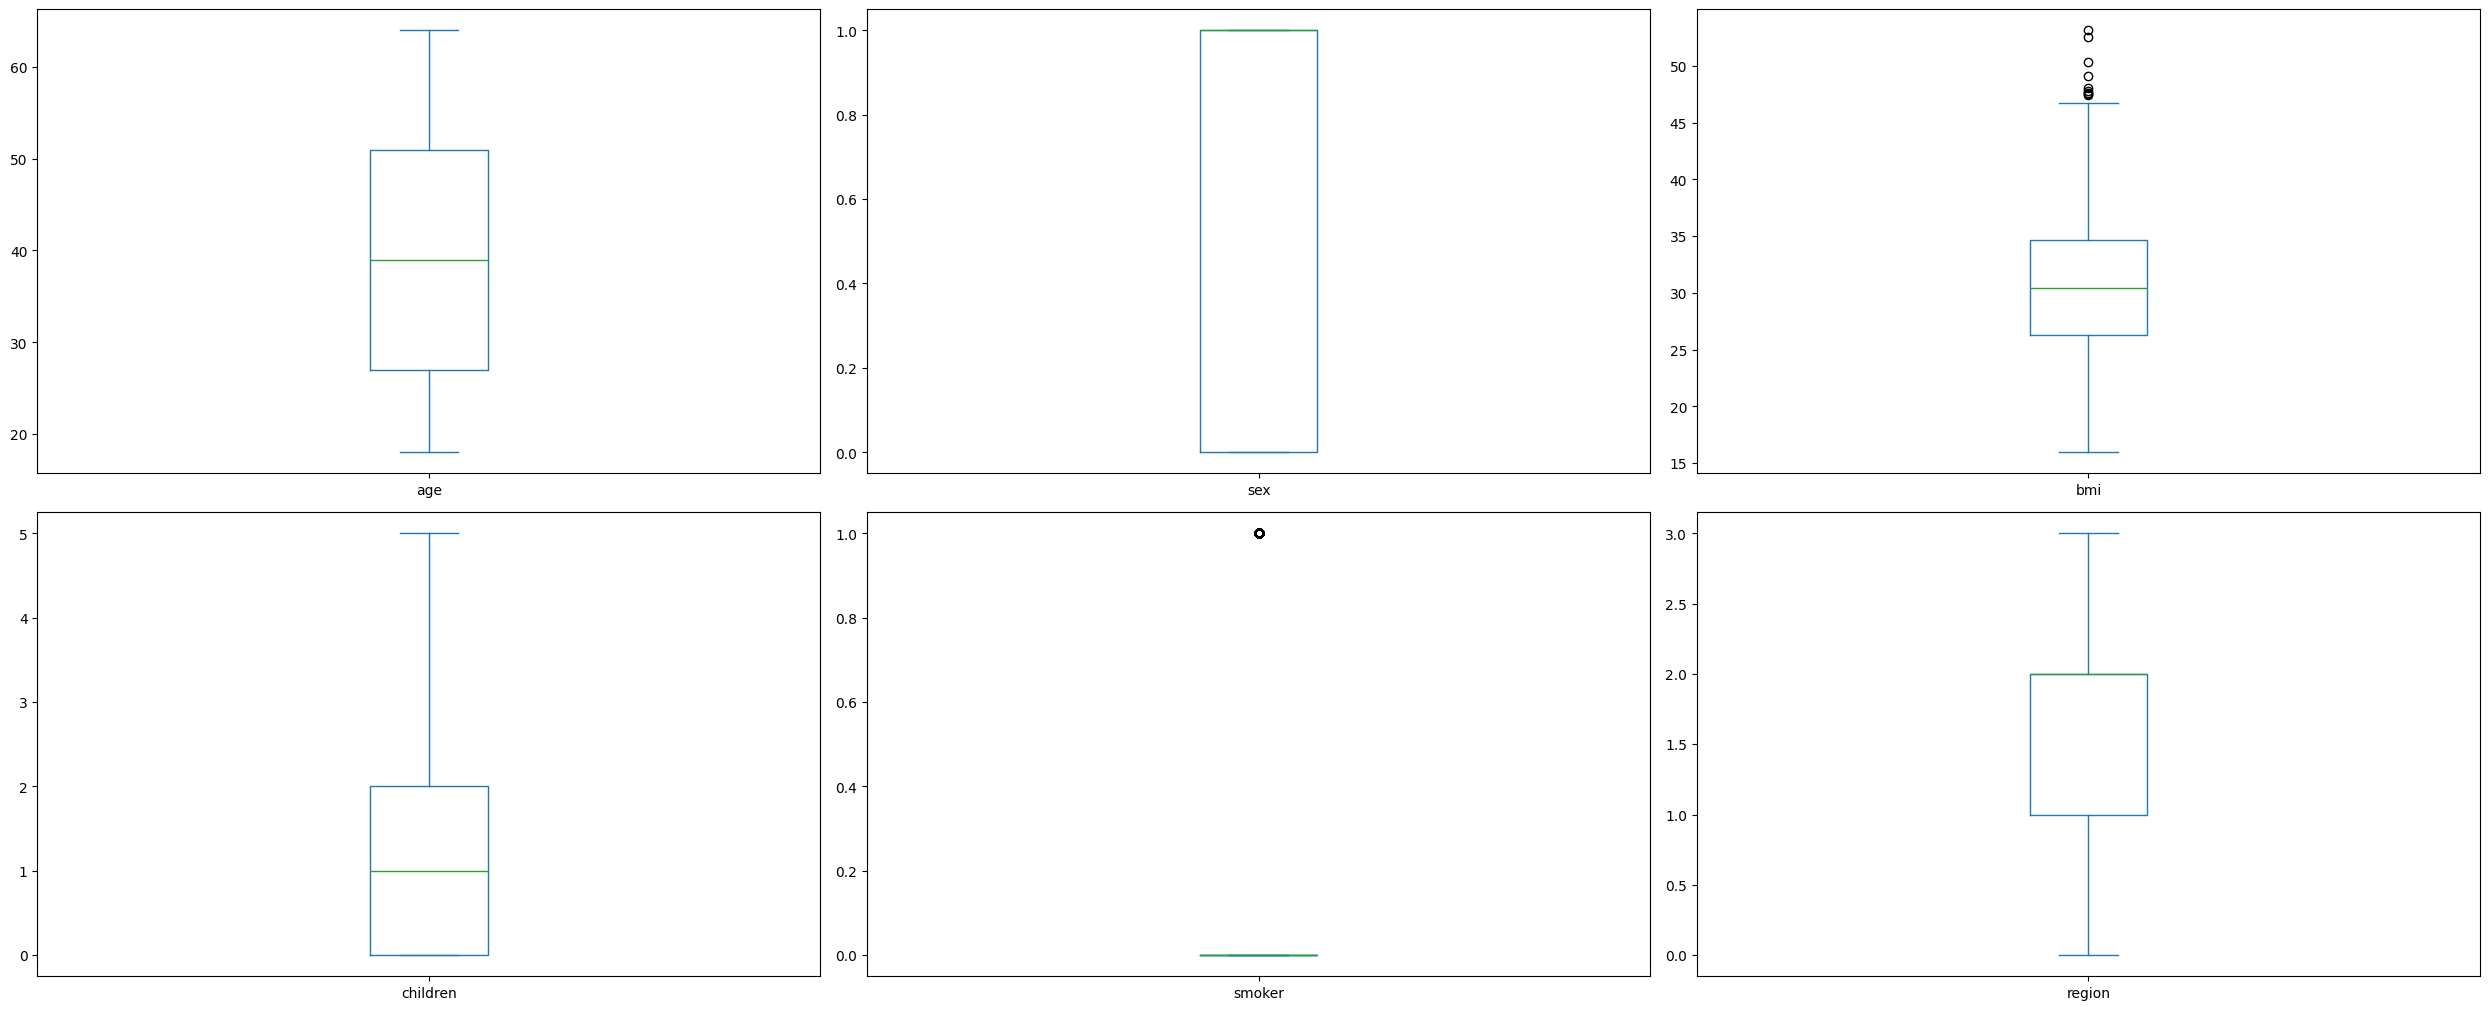

In [63]:
# Plotting boxplot to check the outliers presentin the dataset.
df.iloc[:,0:-1].plot(kind='box',subplots=True,layout=(3,3),figsize=(25,15))
plt.tight_layout()
plt.show()

In [64]:
# importing  Zscore library
from scipy.stats import zscore

In [65]:
z=np.abs(zscore(df['bmi']))
z=z.to_frame()
z

,bmi
0,0.453160
1,0.509422
2,0.383155
3,1.305052
4,0.292456
...,...
1333,0.050269
1334,0.206053
1335,1.014490
1336,0.797524


In [66]:
#threshold=3
print(np.where(z>3))

(array([ 116,  846, 1046, 1316], dtype=int64), array([0, 0, 0, 0], dtype=int64))


In [67]:
z.iloc[116,0]

3.0167243979459

In [69]:
z.iloc[846,0]

3.2331821895290602

In [70]:
z.iloc[1046,0]

3.5939451755009926

In [71]:
z.iloc[1316,0]

3.6841359219939767

In [72]:
# Removing outliers
dfn=df[(z<3).all(axis=1)]

In [73]:
# Comparing dimensions of data before removing outliers and after removing
print('Before removing outliers--', df.shape)
print('After removing outliers--', dfn.shape)

Before removing outliers-- (1337, 7)
After removing outliers-- (1333, 7)


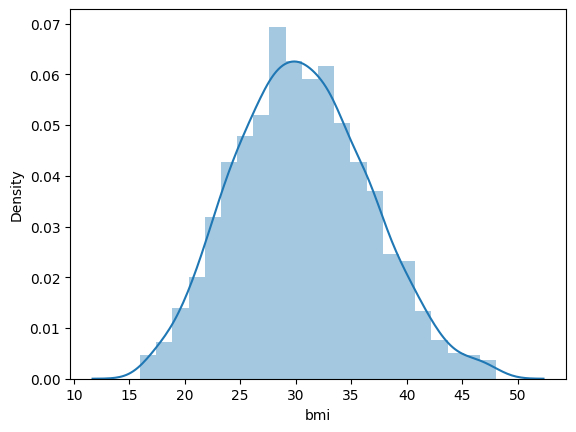

In [74]:
#Checking distribition of bmi
sns.distplot(dfn['bmi'])
plt.show()

In [76]:
# Skewness in dataset
dfn.skew()

age         0.052714
sex        -0.013519
bmi         0.205541
children    0.934451
smoker      1.464636
region     -0.035352
charges     1.517177
dtype: float64

In [77]:
dfn.describe()

,age,sex,bmi,children,smoker,region,charges
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.249062,0.503376,30.601564,1.097524,0.204801,1.514629,13274.344476
std,14.028963,0.500176,6.003179,1.206626,0.403708,1.106548,12090.004775
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4747.052900
50%,39.000000,1.000000,30.305000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.600000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,48.070000,5.000000,1.000000,3.000000,63770.428010


Seperating data into feature and target

In [78]:
x=dfn.iloc[:,0:-1]
y=dfn.iloc[:,-1]

In [79]:
x.shape

(1333, 6)

In [80]:
y.shape

(1333,)

# Scaling the input data

In [81]:
# Importing scaler libraries
from sklearn.preprocessing import StandardScaler

In [82]:
ss=StandardScaler()

In [85]:
# Scaling x using standard scaler
xs=ss.fit_transform(x)
x1=pd.DataFrame(xs,columns=x.columns)
x1

,age,sex,bmi,children,smoker,region
0,-1.443917,-1.006775,-0.450191,-0.909922,1.970478,1.342851
1,-1.515225,0.993271,0.527991,-0.080854,-0.507491,0.438800
2,-0.802147,0.993271,0.399678,1.577282,-0.507491,0.438800
3,-0.445607,0.993271,-1.315891,-0.909922,-0.507491,-0.465250
4,-0.516915,0.993271,-0.286883,-0.909922,-0.507491,-0.465250
...,...,...,...,...,...,...
1328,0.766626,0.993271,0.061396,1.577282,-0.507491,-0.465250
1329,-1.515225,-1.006775,0.219705,-0.909922,-0.507491,-1.369301
1330,-1.515225,-1.006775,1.041245,-0.909922,-0.507491,0.438800
1331,-1.301302,-1.006775,-0.800137,-0.909922,-0.507491,1.342851


# Multicolinearity using VIF

In [86]:
# Import VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
def vif(data):
    vif=pd.DataFrame()
    vif["VIF"]=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    vif['Columns']=data.columns
    return vif

In [89]:
vif(x1)

,VIF,Columns
0,1.017356,age
1,1.008073,sex
2,1.041622,bmi
3,1.002544,children
4,1.006479,smoker
5,1.025430,region


In [90]:
x1.shape

(1333, 6)

In [91]:
y.shape

(1333,)

# Modeling

In [92]:
# Importing Regression task libraries
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

Finding Best Random state

In [128]:
def bestRS(x,y):
    rs=0
    ac=0
    for i in range(1,400):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        gbr=GradientBoostingRegressor()
        gbr.fit(x_train,y_train)
        pred=la.predict(x_test)
        acc=r2_score(y_test,pred)
        if acc>ac:
            ac=acc
            rs=i
    print('Highest r2_score {}% at random_state:- {}'.format(round(ac*100,2),rs))

In [129]:
bestRS(x1,y)

Highest r2_score 80.25% at random_state:- 337


In [130]:
# Splitting The Dataset
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,test_size=0.30,random_state=337)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(933, 6)
(400, 6)
(933,)
(400,)


Finding Best Model

In [185]:
# Linear Regresson Model
lr=LinearRegression()
lr.fit(xtrain,ytrain)
predLR=lr.predict(xtest)
LRr2score=r2_score(ytest,predLR)*100
print('Model:- ',lr)
print('\n')
print('r2score ',LRr2score)
print('MSE ',mean_squared_error(ytest,predLR))
print('MAE ',mean_absolute_error(ytest,predLR))
print('RMSE ',np.sqrt(mean_squared_error(ytest,predLR)))

Model:-  LinearRegression()


r2score  80.25151240592419
MSE  29705660.255612183
MAE  3813.178199272491
RMSE  5450.289923995987


In [186]:
# ExtraTreeRegressor
etr=ExtraTreesRegressor()
etr.fit(xtrain,ytrain)
predETR=etr.predict(xtest)
ETRr2score=r2_score(ytest,predETR)*100
print('Model:- ',etr)
print('\n')
print('r2score ',ETRr2score)
print('MSE ',mean_squared_error(ytest,predETR))
print('MAE ',mean_absolute_error(ytest,predETR))
print('RMSE ',np.sqrt(mean_squared_error(ytest,predETR)))

Model:-  ExtraTreesRegressor()


r2score  85.34350383065785
MSE  22046290.566309776
MAE  2543.8728342644736
RMSE  4695.347757760843


In [187]:
# RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
predRFR=rfr.predict(xtest)
RFRr2score=r2_score(ytest,predRFR)*100
print('Model:- ',rfr)
print('\n')
print('r2score ',RFRr2score)
print('MSE ',mean_squared_error(ytest,predRFR))
print('MAE ',mean_absolute_error(ytest,predRFR))
print('RMSE ',np.sqrt(mean_squared_error(ytest,predRFR)))

Model:-  RandomForestRegressor()


r2score  86.66109436833422
MSE  20064371.865863834
MAE  2633.5207178846113
RMSE  4479.327166647223


In [188]:
# Lasso regressor
la=Lasso()
la.fit(xtrain,ytrain)
predLA=la.predict(xtest)
LAr2score=r2_score(ytest,predLA)*100
print('Model:-', la)
print('\n')
print('r2score ',LAr2score)
print('MSE ',mean_squared_error(ytest,predLA))
print('MAE ',mean_absolute_error(ytest,predLA))
print('RMSE ',np.sqrt(mean_squared_error(ytest,predLA)))

Model:- Lasso()


r2score  80.2510650008398
MSE  29706333.2420052
MAE  3813.036822507043
RMSE  5450.351662232924


In [189]:
# Ridge Regressor
rr=Ridge()
rr.fit(xtrain,ytrain)
predRR=rr.predict(xtest)
RRr2score=r2_score(ytest,predRR)*100
print('Model:- ',rr)
print('\n')
print('r2score ',RRr2score)
print('MSE ',mean_squared_error(ytest,predRR))
print('MAE ',mean_absolute_error(ytest,predRR))
print('RMSE ',np.sqrt(mean_squared_error(ytest,predRR)))

Model:-  Ridge()


r2score  80.24250754928096
MSE  29719205.354234044
MAE  3815.020548477175
RMSE  5451.532385874089


In [190]:
# Gradient Boosting Regressor
gbr=GradientBoostingRegressor()
gbr.fit(xtrain,ytrain)
predGBR=gbr.predict(xtest)
GBRr2score=r2_score(ytest,predGBR)*100
print('Model:- ',gbr)
print('\n')
print('r2score ',GBRr2score)
print('MSE ',mean_squared_error(ytest,predGBR))
print('MAE ',mean_absolute_error(ytest,predGBR))
print('RMSE ',np.sqrt(mean_squared_error(ytest,predGBR)))

Model:-  GradientBoostingRegressor()


r2score  89.48408136146558
MSE  15818036.944037793
MAE  2352.5031294402074
RMSE  3977.1895785891065


In [191]:
# AdaBoost Regressor
abr=AdaBoostRegressor()
abr.fit(xtrain,ytrain)
predABR=abr.predict(xtest)
ABRr2score=r2_score(ytest,predABR)*100
print('Model:- ',abr)
print('\n')
print('r2score ',ABRr2score)
print('MSE ',mean_squared_error(ytest,predABR))
print('MAE ',mean_absolute_error(ytest,predABR))
print('RMSE ',np.sqrt(mean_squared_error(ytest,predABR)))

Model:-  AdaBoostRegressor()


r2score  84.9808556647045
MSE  22591785.66606428
MAE  3913.790164010995
RMSE  4753.081702018626


In [192]:
# Kneighbors regressor
knr=KNR()
knr.fit(xtrain,ytrain)
predKNR=knr.predict(xtest)
KNRr2score=r2_score(ytest,predKNR)*100
print('Model:- ',knr)
print('\n')
print('r2score ',KNRr2score)
print('MSE ',mean_squared_error(ytest,predKNR))
print('MAE ',mean_absolute_error(ytest,predKNR))
print('RMSE ',np.sqrt(mean_squared_error(ytest,predKNR)))

Model:-  KNeighborsRegressor()


r2score  85.3351048607902
MSE  22058924.29049739
MAE  3004.0785812439995
RMSE  4696.6929099630715


In [193]:
# Decision Tree Regressor
dtr=DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
predDTR=dtr.predict(xtest)
DTRr2score=r2_score(ytest,predDTR)*100
print('Model:- ',dtr)
print('\n')
print('r2score ',DTRr2score)
print('MSE ',mean_squared_error(ytest,predDTR))
print('MAE ',mean_absolute_error(ytest,predDTR))
print('RMSE ',np.sqrt(mean_squared_error(ytest,predDTR)))

Model:-  DecisionTreeRegressor()


r2score  76.80734184644886
MSE  34886379.0329249
MAE  2696.8422496250005
RMSE  5906.469252685982


Conclusion:- GradiendBoostingRegressor is performing better than other models with r2_score of 89.48 % and also less mean absolute error.

# Cross Validation Score of Models

In [194]:
# Cross Val Score of Linear Regresson
scoreLR=cross_val_score(lr,x1,y)
print(scoreLR)
print(scoreLR.mean())
print('Differnce Between cross val score and r2 score of Linear Regresson Model:- ',LRr2score-scoreLR.mean()*100)

[0.76244183 0.70819898 0.775179   0.73289379 0.75587313]
0.7469173454313716
Differnce Between cross val score and r2 score of Linear Regresson Model:-  5.55977786278703


In [195]:
#Cross Val Score of ExtraTreeRegressor
scoreETR=cross_val_score(etr,x1,y,cv=9)
print(scoreETR)
print(scoreETR.mean())
print('Differnce Between cross val score and r2 score of ExtraTreeRegressor Model:- ',ETRr2score-scoreETR.mean()*100)

[0.83749272 0.86117735 0.76590478 0.73011157 0.86119762 0.87558391
 0.72811016 0.8555438  0.84583112]
0.8178836705571904
Differnce Between cross val score and r2 score of ExtraTreeRegressor Model:-  3.5551367749388163


In [196]:
#Cross Val Score of Lasso
scoreLA=cross_val_score(la,x1,y)
print(scoreLA)
print(scoreLA.mean())
print('Differnce Between cross val score and r2 score of Lasso Model:- ',LAr2score-scoreLA.mean()*100)

[0.76244813 0.70823259 0.775161   0.73289107 0.75587816]
0.7469221922275621
Differnce Between cross val score and r2 score of Lasso Model:-  5.558845778083594


In [197]:
#Cross Val Score of RandomForestTRegressor
scoreRFR=cross_val_score(rfr,x1,y)
print(scoreRFR)
print(scoreRFR.mean())
print('Differnce Between cross val score and r2 score of RandomForestRegressor:- ',RFRr2score-scoreRFR.mean()*100)

[0.8483393  0.7708008  0.86848359 0.8286129  0.8518326 ]
0.8336138397363632
Differnce Between cross val score and r2 score of RandomForestRegressor:-  3.2997103946978967


In [198]:
#Cross Val Score of Ridge
scoreRR=cross_val_score(rr,x1,y)
print(scoreRR)
print(scoreRR.mean())
print('Differnce Between cross val score and r2 score of Ridge Model:- ',RRr2score-scoreRR.mean()*100)

[0.76244687 0.70830249 0.77506506 0.73295139 0.75584442]
0.746922046035292
Differnce Between cross val score and r2 score of Ridge Model:-  5.550302945751753


In [199]:
#Cross Val Score of GradientBoostingRegressor
scoreGBR=cross_val_score(gbr,x1,y)
print(scoreGBR)
print(scoreGBR.mean())
print('Differnce Between cross val score and r2 score of GradientBoostingRegressor:-  ',GBRr2score-scoreGBR.mean()*100)

[0.8737523  0.79829872 0.88825312 0.8476551  0.85975407]
0.8535426622484769
Differnce Between cross val score and r2 score of GradientBoostingRegressor:-   4.129815136617893


In [200]:
#Cross Val Score of AdaBoostRegressor
scoreABR=cross_val_score(abr,x1,y)
print(scoreABR)
print(scoreABR.mean())
print('Differnce Between cross val score and r2 score of AdaBoostRegressor',ABRr2score-scoreABR.mean()*100)

[0.85080497 0.79065626 0.84875993 0.80785524 0.8422228 ]
0.828059838598677
Differnce Between cross val score and r2 score of AdaBoostRegressor 2.1748718048367977


In [201]:
#Cross Val Score of KNR
scoreKNR=cross_val_score(knr,x1,y)
print(scoreKNR)
print(scoreKNR.mean())
print('Differnce Between cross val score and r2 score of KNR Model:- ',KNRr2score-scoreKNR.mean()*100)

[0.82380042 0.75518371 0.83689594 0.80187345 0.80757419]
0.8050655418851447
Differnce Between cross val score and r2 score of KNR Model:-  4.828550672275725


In [202]:
# Cross Val Score of DecisionTreeRegressor
scoreDTR=cross_val_score(dtr,x1,y)
print(scoreDTR)
print(scoreDTR.mean())
print('Differnce Between cross val score and r2 score of DecisionTreeRegressor:- ',DTRr2score-scoreDTR.mean()*100)

[0.76075039 0.68457177 0.75701554 0.72533097 0.71004975]
0.727543683952368
Differnce Between cross val score and r2 score of DecisionTreeRegressor:-  4.052973451212068


Conclusion:- AdaBoostRegressor has less differnce between r2 score and cross val score 2.1, and Also has r2_score of 84. So considering it the best performing model.

# Hyper Parameter Tuning

In [203]:
# Importing GridsearchCV Library
from sklearn.model_selection import GridSearchCV

In [213]:
params={'n_estimators':[50,100,150,200],
        'learning_rate':[0.0001,0.01,0.1,1.0],
        'loss':['linear','square']}

In [214]:
gscv=GridSearchCV(abr,params)

In [215]:
gscv.fit(xtrain,ytrain)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1.0],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 150, 200]})

In [216]:
gscv.best_params_

{'learning_rate': 0.0001, 'loss': 'linear', 'n_estimators': 100}

In [217]:
ModelABR=AdaBoostRegressor(learning_rate=0.0001,loss='linear',n_estimators=100)

In [218]:
ModelABR.fit(xtrain,ytrain)
predModel=ModelABR.predict(xtest)
print('Model R2 Score:- ',r2_score(ytest,predModel)*100)

Model R2 Score:-  89.34661081609428


# Saving Model

In [219]:
# importing pickle
import pickle

In [221]:
# saving Best model using pickle
filename='medical_charges.pkl'
pickle.dump(ModelABR,open(filename,'wb'))

In [222]:
# Loading saved model
load_model=pickle.load(open('medical_charges.pkl','rb'))

In [224]:
# Checking model score
print(r2_score(ytest,load_model.predict(xtest))*100)

89.34661081609428
